### FASHION-MNIST

paper : https://arxiv.org/abs/1708.07747 (data)

In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.models import Sequential
from keras.utils import np_utils

In [7]:
X_train = np.load('X_FM.npy')
Y_train = np.load('Y_FM.npy')

In [8]:
X_train = X_train.reshape((60000,28,28))
X_train = X_train/255.0
Y_train = np_utils.to_categorical(Y_train)
print X_train.shape, Y_train.shape

(60000, 28, 28) (60000, 10)


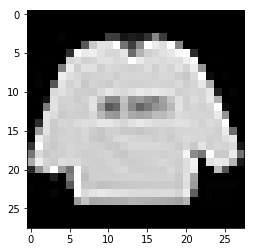

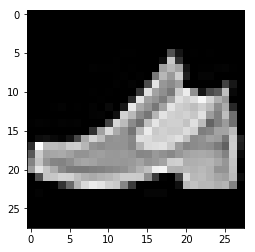

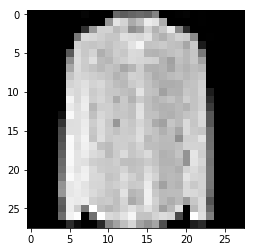

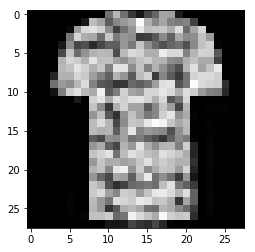

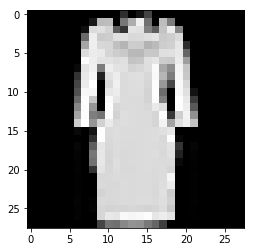

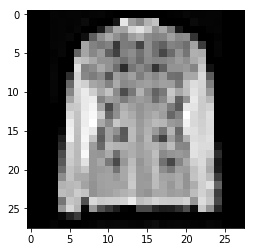

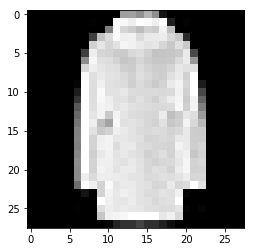

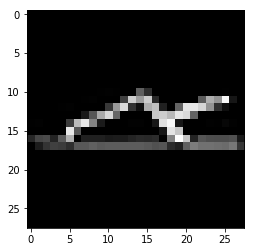

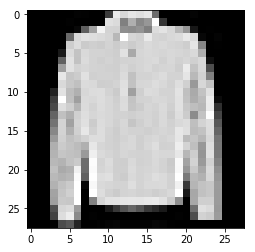

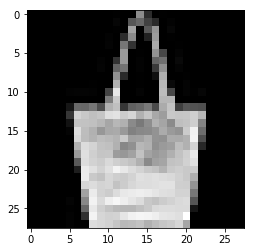

In [9]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(X_train[ix], interpolation='none', cmap='gray')
plt.show()

In [10]:
X_train = X_train.reshape((60000,28,28,1))

In [11]:
model = Sequential()
model.add(Convolution2D(32, (5,5),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64, (5,5),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 32)          51232     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 8)           6408      
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
__________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
hist = model.fit(X_train,Y_train,
                 epochs=15,
                 shuffle=True,
                 batch_size=256,
                 validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 82s - loss: 0.8295 - acc: 0.6981 - val_loss: 0.5562 - val_acc: 0.7947
Epoch 2/15
48000/48000 [==============================] - 52s - loss: 0.5064 - acc: 0.8165 - val_loss: 0.4346 - val_acc: 0.8486
Epoch 3/15
48000/48000 [==============================] - 52s - loss: 0.4221 - acc: 0.8503 - val_loss: 0.3869 - val_acc: 0.8607
Epoch 4/15
48000/48000 [==============================] - 53s - loss: 0.3787 - acc: 0.8650 - val_loss: 0.3622 - val_acc: 0.8748
Epoch 5/15
48000/48000 [==============================] - 54s - loss: 0.3521 - acc: 0.8731 - val_loss: 0.3317 - val_acc: 0.8852
Epoch 6/15
48000/48000 [==============================] - 52s - loss: 0.3339 - acc: 0.8790 - val_loss: 0.3117 - val_acc: 0.8917
Epoch 7/15
48000/48000 [==============================] - 52s - loss: 0.3119 - acc: 0.8875 - val_loss: 0.3086 - val_acc: 0.8908
Epoch 8/15
48000/48000 [==============================

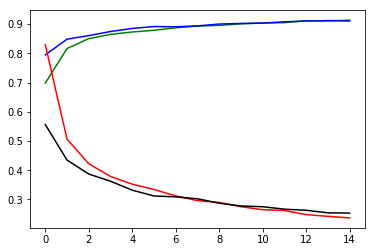

In [14]:
plt.plot(hist.history['acc'],'g')
plt.plot(hist.history['val_acc'],'b')
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'black')